In [29]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [30]:
# Load the data
obesity = pd.read_csv("obesity.csv")
# Inspect the data
obesity.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [31]:
# Split the data into predictor variables and an outcome variable
X = obesity.drop(columns=['NObeyesdad'])
# print(X.head())
y = obesity["NObeyesdad"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: NObeyesdad, dtype: int64

In [32]:
# Create a logistic regression model
lr = LogisticRegression(max_iter = 100)


In [33]:
# Fit the logistic regression model
lr.fit(X,y)
print(lr.score(X,y))

0.7683562292752251


C:\Users\EmmanuelOkyereGyaten\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Print the accuracy of the model



In [35]:
# Create a sequential forward selection model
sfs = SFS(estimator = lr, forward = True, floating = False, k_features =9, scoring = "accuracy", cv = 0)


In [51]:
# Fit the sequential forward selection model to X and y
sfs.fit(X,y)
# Inspect the results of sequential forward selection
print(sfs.subsets_[9])

{'feature_idx': (0, 1, 2, 3, 6, 7, 10, 14, 17), 'cv_scores': array([0.78114638]), 'avg_score': 0.7811463761250592, 'feature_names': (0, 1, 2, 3, 6, 7, 10, 14, 17)}


In [37]:
# See which features sequential forward selection chose
print(sfs.subsets_[9]["feature_names"])


('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')


In [38]:
# Print the model accuracy after doing sequential forward selection
print(sfs.subsets_[9]["avg_score"])


0.7835149218379914


C:\Users\EmmanuelOkyereGyaten\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\EmmanuelOkyereGyaten\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


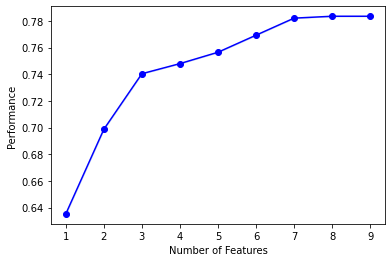

<Figure size 432x288 with 0 Axes>

In [39]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sfs.get_metric_dict())
plt.show()
plt.clf()

In [40]:
# Create a sequential backward selection model
sbs = SFS(estimator = lr, forward =False, floating = False, k_features = 7, scoring='accuracy', cv= 0)


In [52]:
# Fit the sequential backward selection model to X and y
sbs.fit(X,y)
# Inspect the results of sequential backward selection
print(sbs.subsets_[7])

{'feature_idx': (1, 2, 3, 4, 6, 9, 16), 'cv_scores': array([0.76409285]), 'avg_score': 0.7640928469919469, 'feature_names': ('Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Public_Transportation')}


In [42]:
# See which features sequential backward selection chose
print(sbs.subsets_[7]["feature_names"])


('Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Public_Transportation')


In [43]:
# Print the model accuracy after doing sequential backward selection
print(sbs.subsets_[7]["avg_score"])


0.7640928469919469


C:\Users\EmmanuelOkyereGyaten\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\EmmanuelOkyereGyaten\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


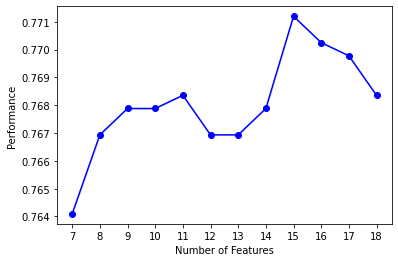

In [44]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sbs.get_metric_dict())
plt.show()

In [45]:
# Get feature names
features = X.columns


In [46]:
# Standardize the data
df = StandardScaler()
X = pd.DataFrame(df.fit_transform(X))


In [47]:
# Create a recursive feature elimination model
rfe = RFE(estimator = lr, n_features_to_select =8)


In [48]:
# Fit the recursive feature elimination model to X and y
rfe.fit(X,y)


RFE(estimator=LogisticRegression(), n_features_to_select=8)

In [49]:
# See which features recursive feature elimination chose
ref_features = [i for (i,support) in zip(features,rfe.support_) if support ]


In [50]:
# Print the model accuracy after doing recursive feature elimination
print(rfe.score(X,y))

0.7678825201326386
